In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
with open("results/lin_sim_results.pkl", "rb") as file:
    lin_results = pkl.load(file)

with open("results/lss_sim_results.pkl", "rb") as file:
    lss_results = pkl.load(file)

with open("results/poly_sim_results.pkl", "rb") as file:
    poly_results = pkl.load(file)

In [3]:
def plot_curves(results, with_linear=True):
    results_df = results["vals"]
    title_string = ""
    for k, v in results.items():
        if k != "vals":
            title_string += f"{k} = {v}, "
    title_string = title_string[:-2]
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    plot_types = ["mse", "bias", "variance"]
    for idx, ax in enumerate(axes):
        plot_type = plot_types[idx]
        results_df_filtered = results_df[results_df["type"] == "figs"]
        ax.plot(results_df_filtered["n_rules"], results_df_filtered[plot_type], label='figs')
        results_df_filtered = results_df[results_df["type"] == "cart"]
        ax.plot(results_df_filtered["n_rules"], results_df_filtered[plot_type], label='cart')
        results_df_filtered = results_df[(results_df["type"] == "gb") & (results_df["max_depth"] == 1)]
        ax.plot(results_df_filtered["n_rules"], results_df_filtered[plot_type], label='gb1')
        results_df_filtered = results_df[(results_df["type"] == "gb") & (results_df["max_depth"] == 2)]
        ax.plot(results_df_filtered["n_rules"], results_df_filtered[plot_type], label='gb2')
        lin_model_val = results_df[results_df["type"] == "linear"][plot_type].values[0]
        if with_linear:
            ax.axhline(y=lin_model_val, label='linear', ls='--', color="black")
        ax.set_title(plot_type)
        ax.set_xlabel("No. of rules")
        ax.set_ylabel("Error")
        if idx == 2:
            ax.legend()
    plt.tight_layout()
    plt.suptitle(title_string, fontsize=16, y = 1.1)
    plt.show()

# Linear results

In [4]:
param_grid = {
    "sigma": [0.1, 1, 10],
    "s": [2, 4, 6]
}

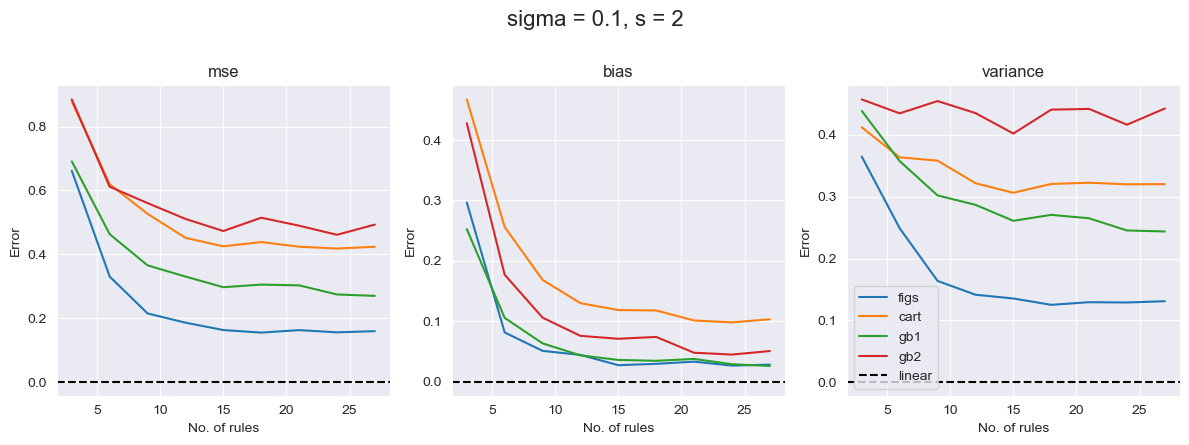

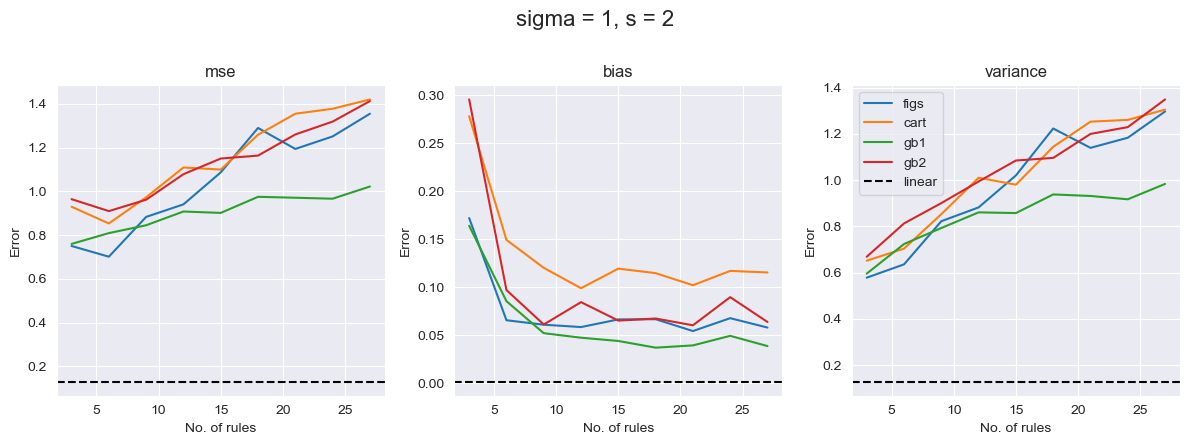

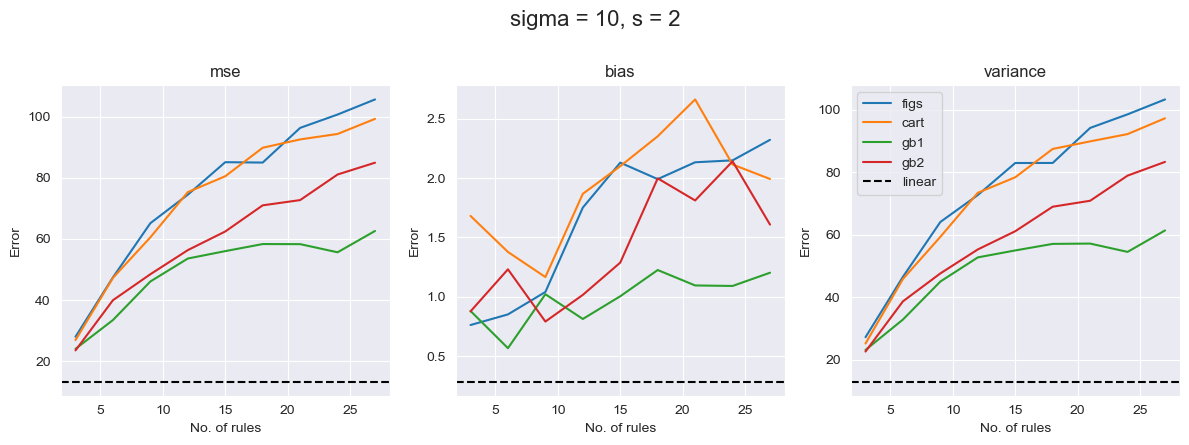

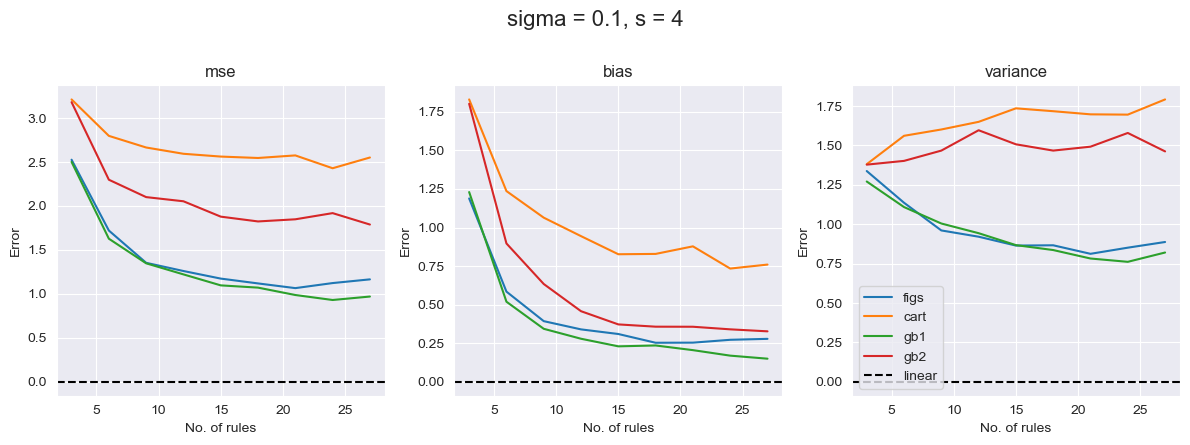

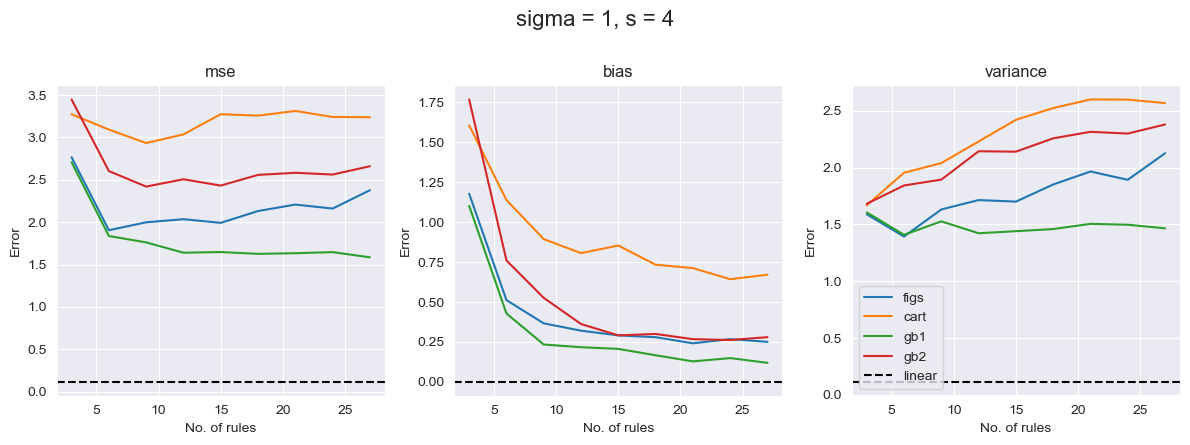

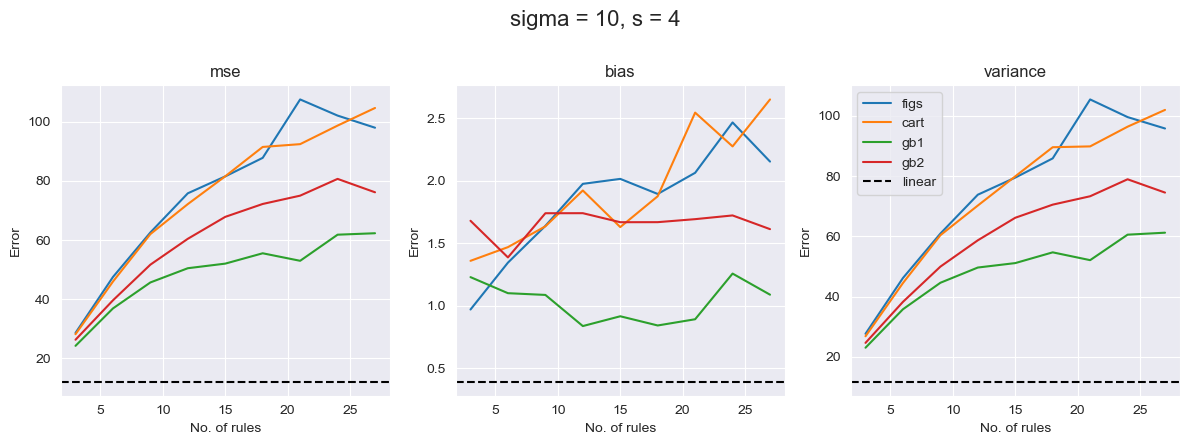

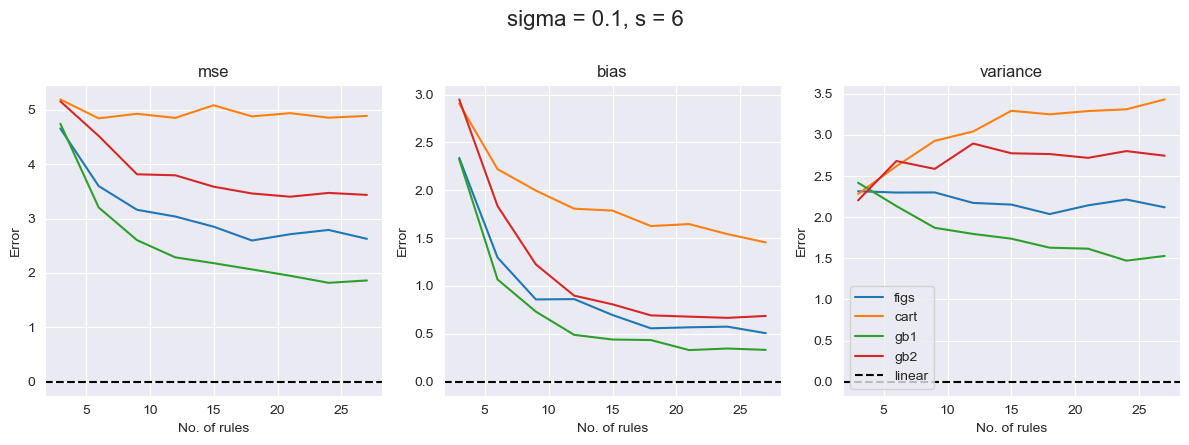

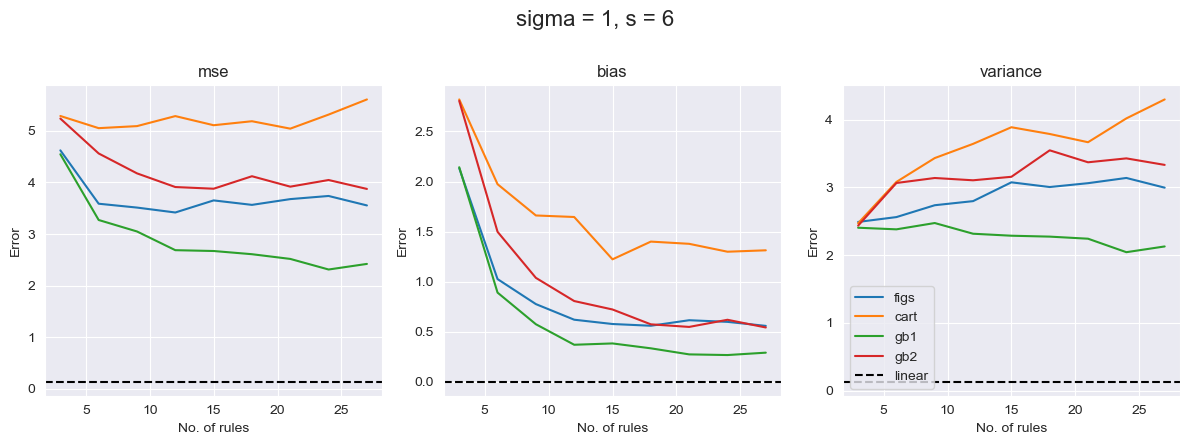

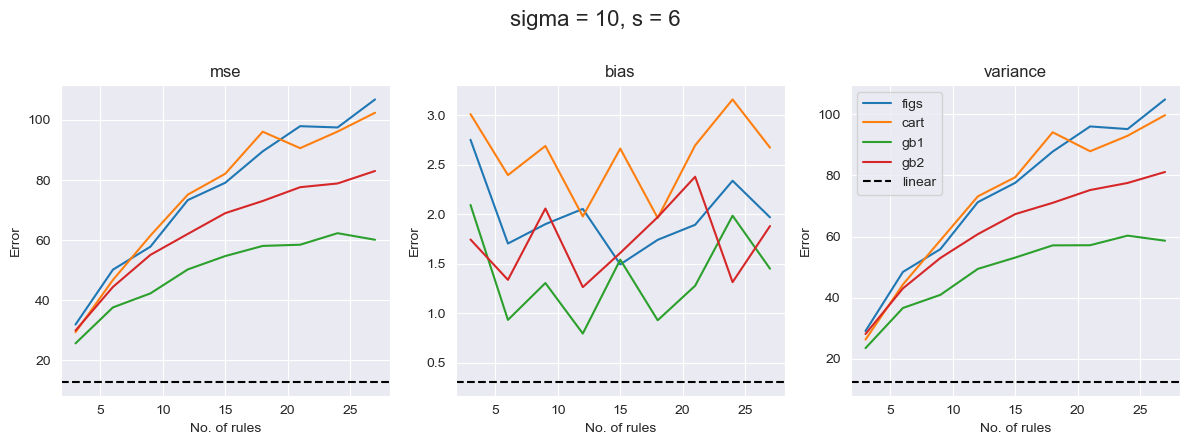

In [5]:
for results in lin_results:
    plot_curves(results)

# LSS results

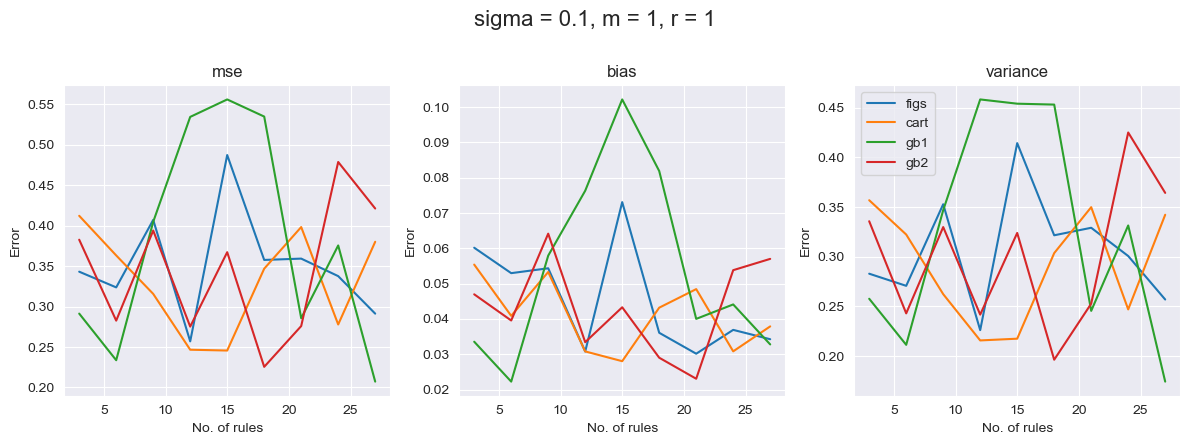

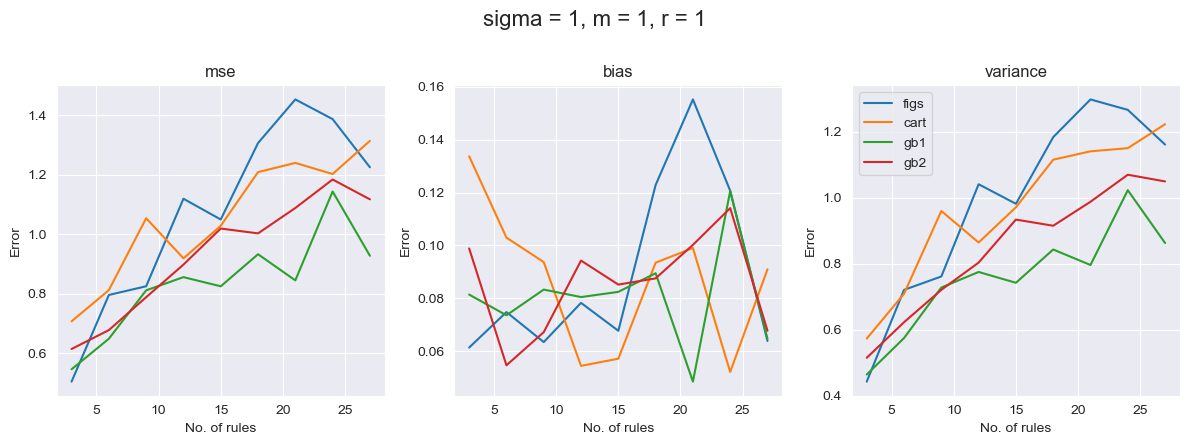

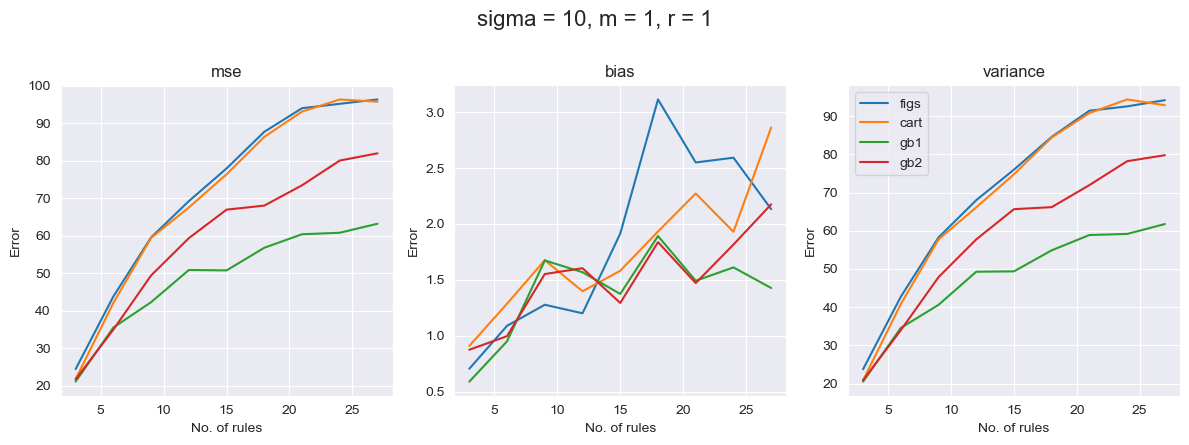

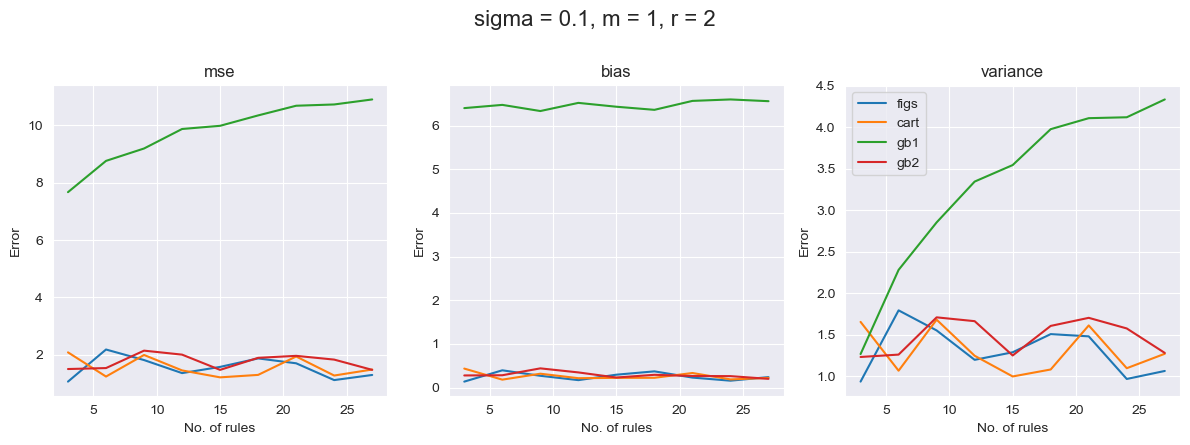

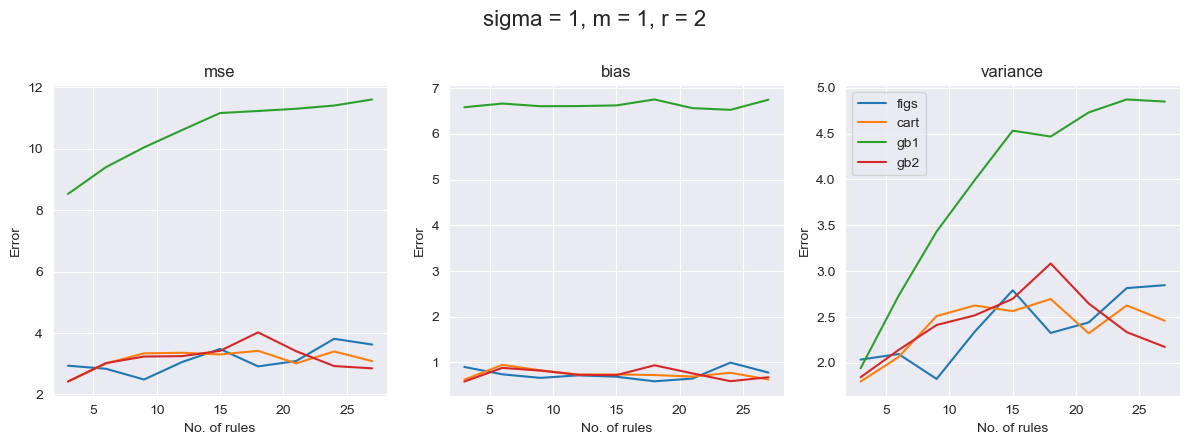

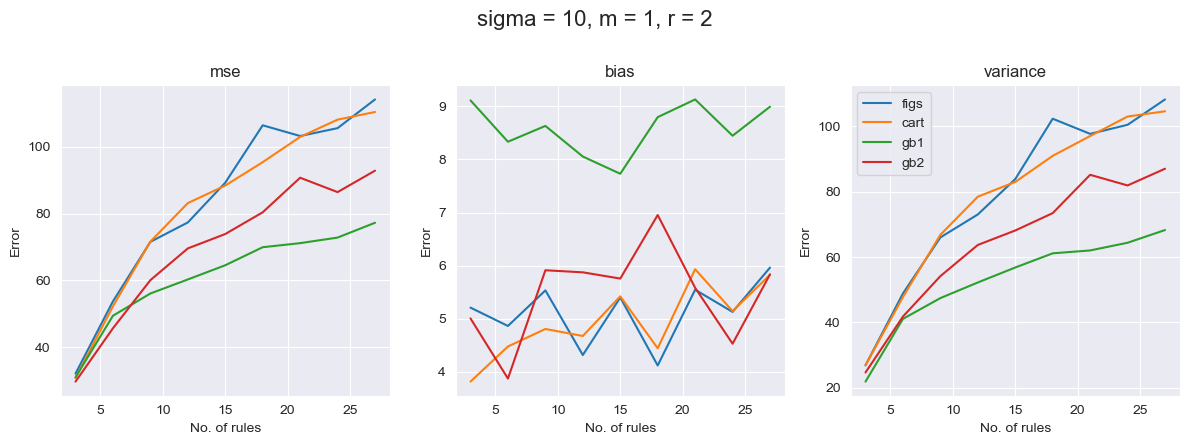

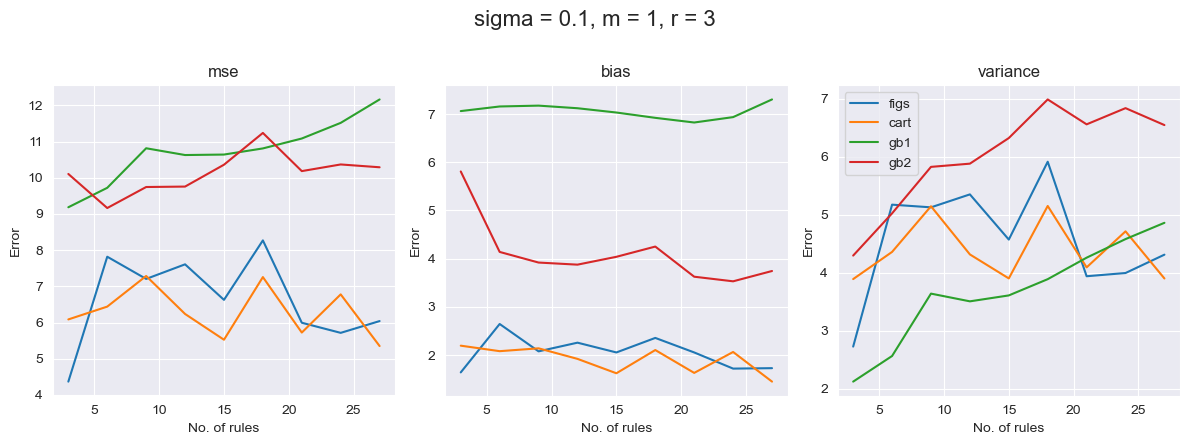

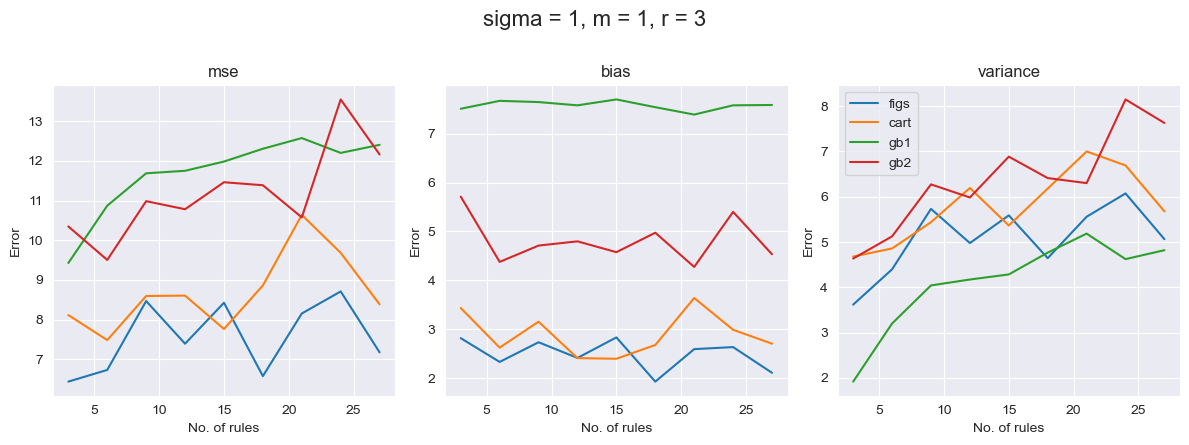

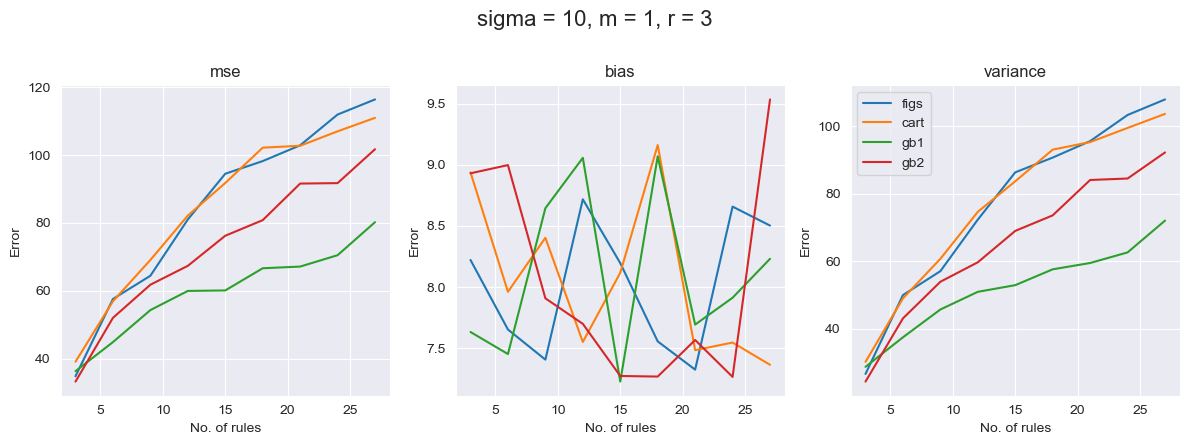

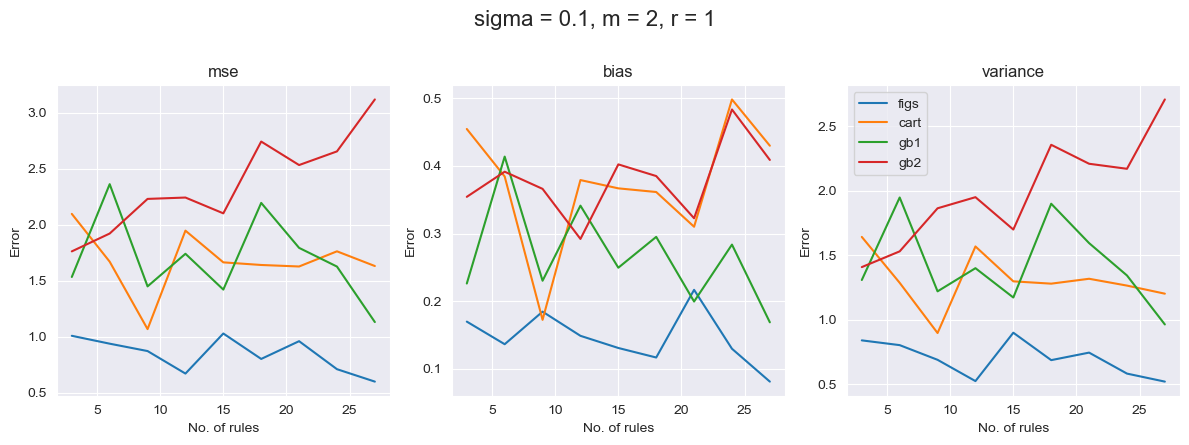

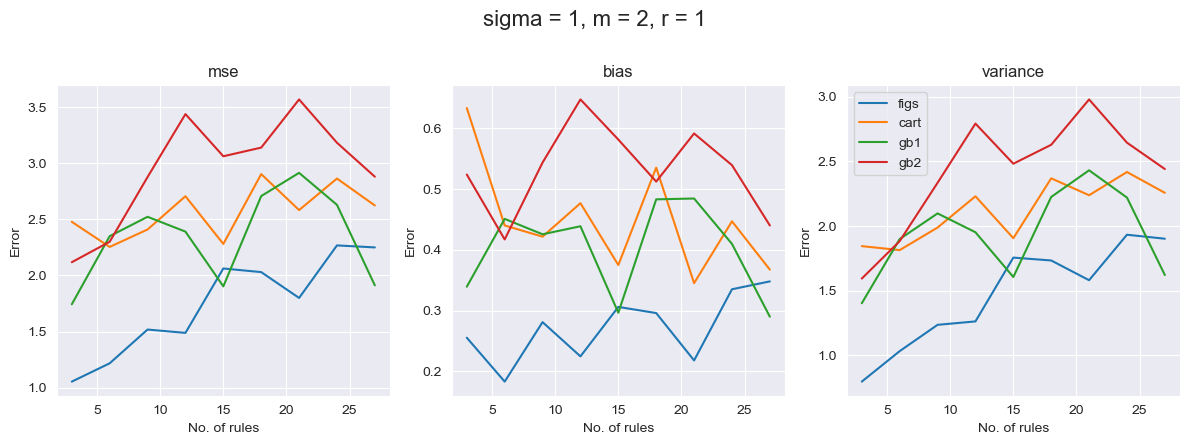

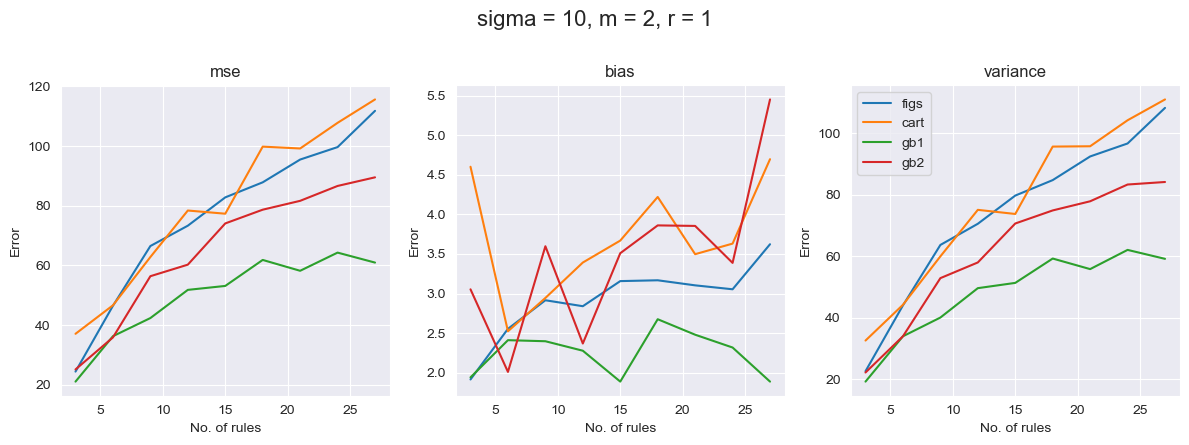

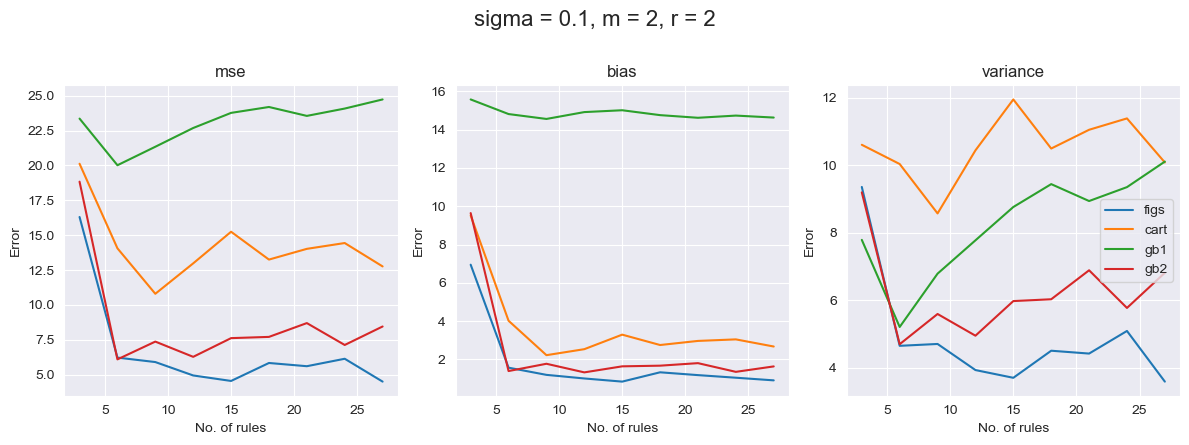

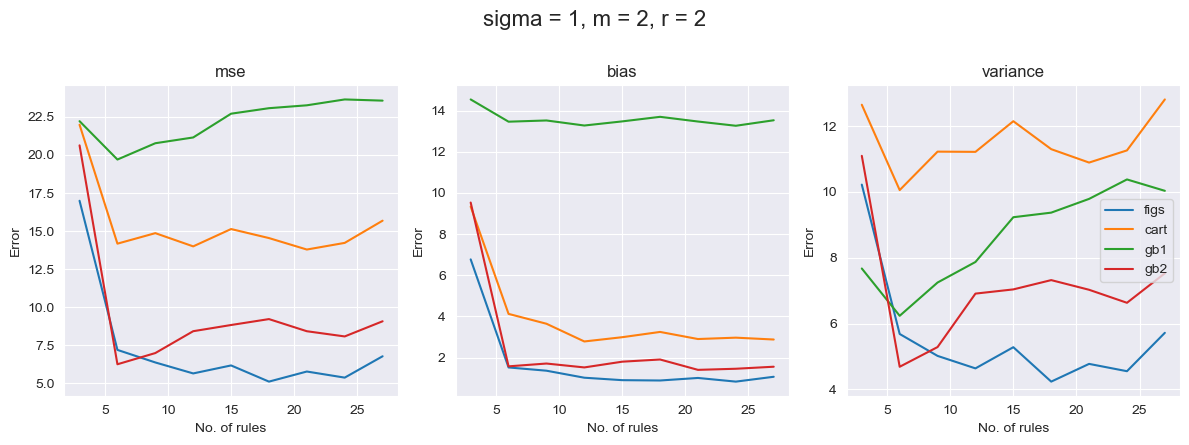

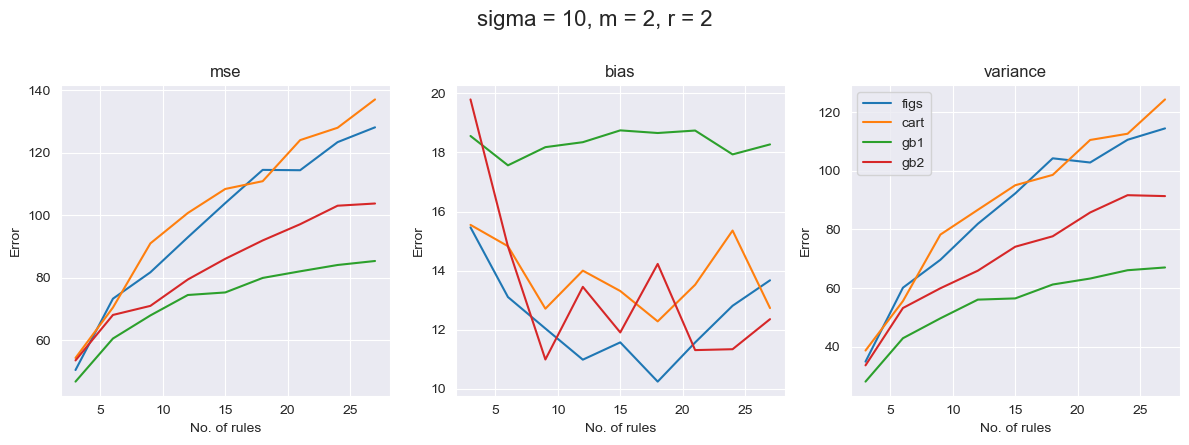

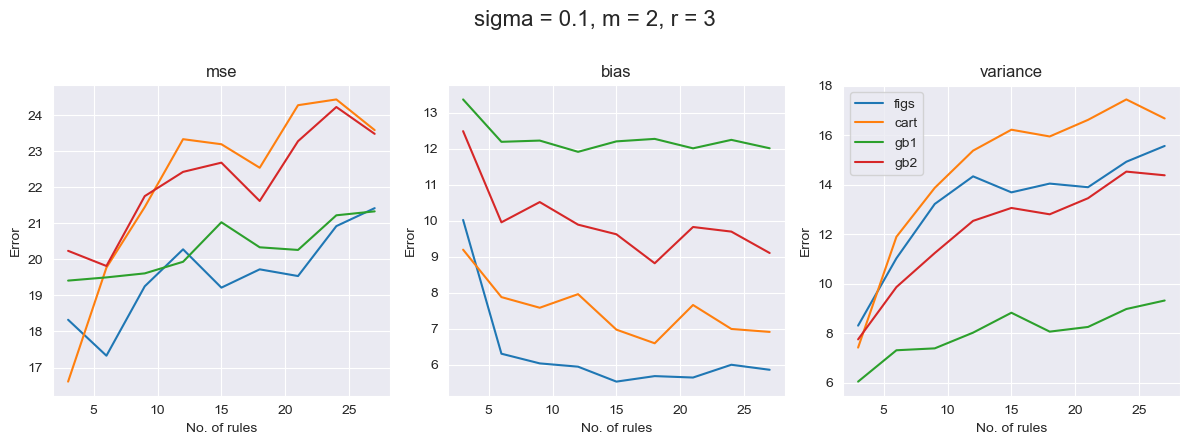

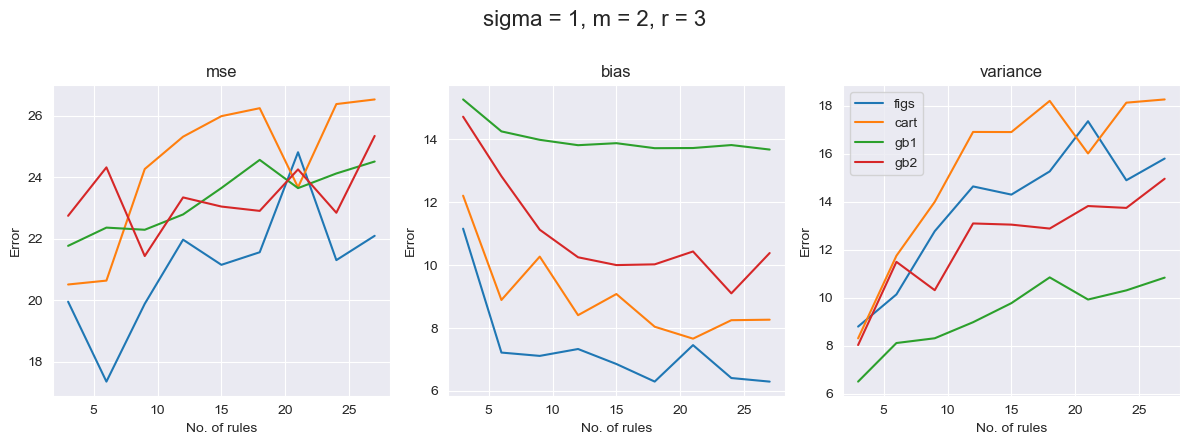

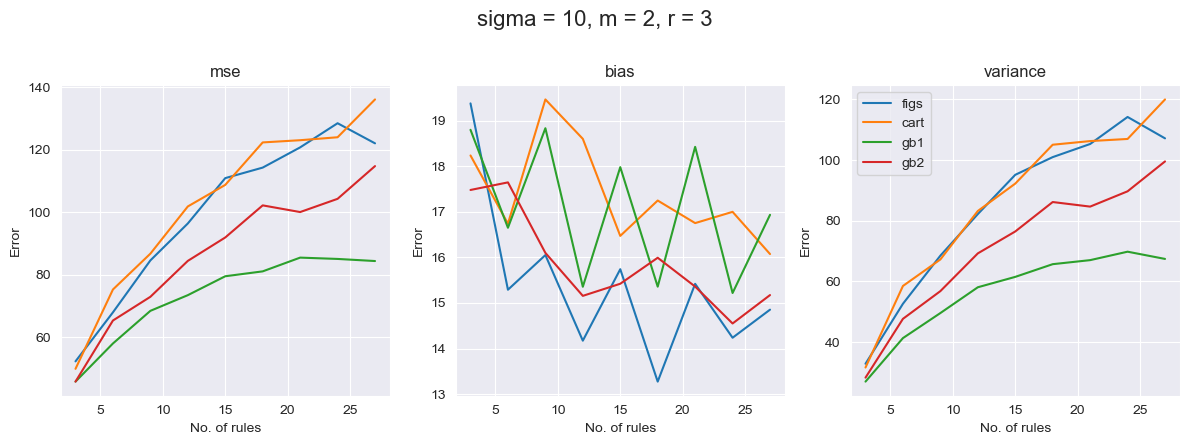

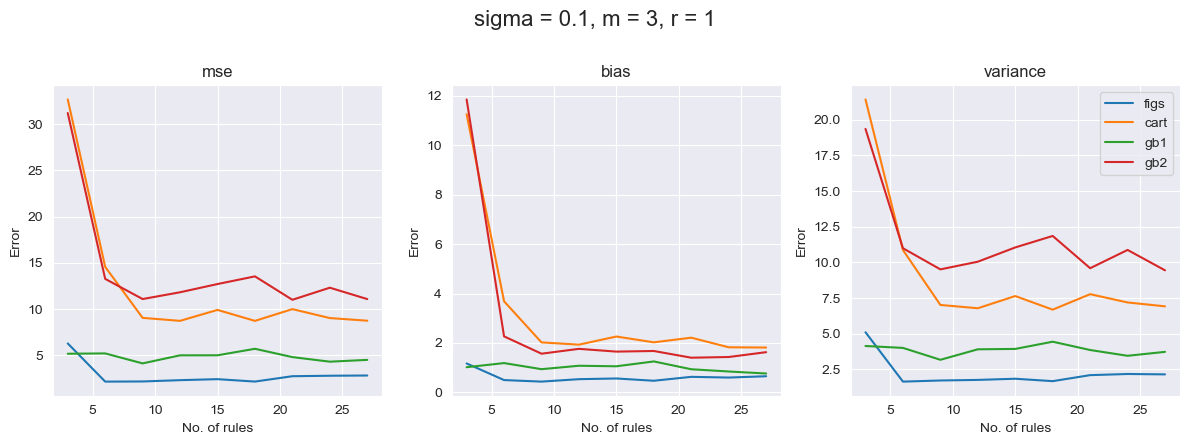

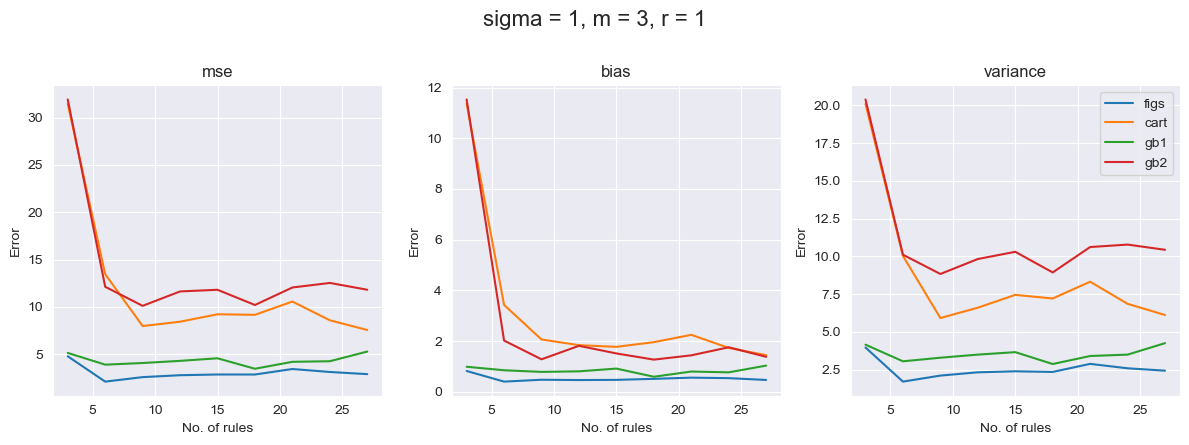

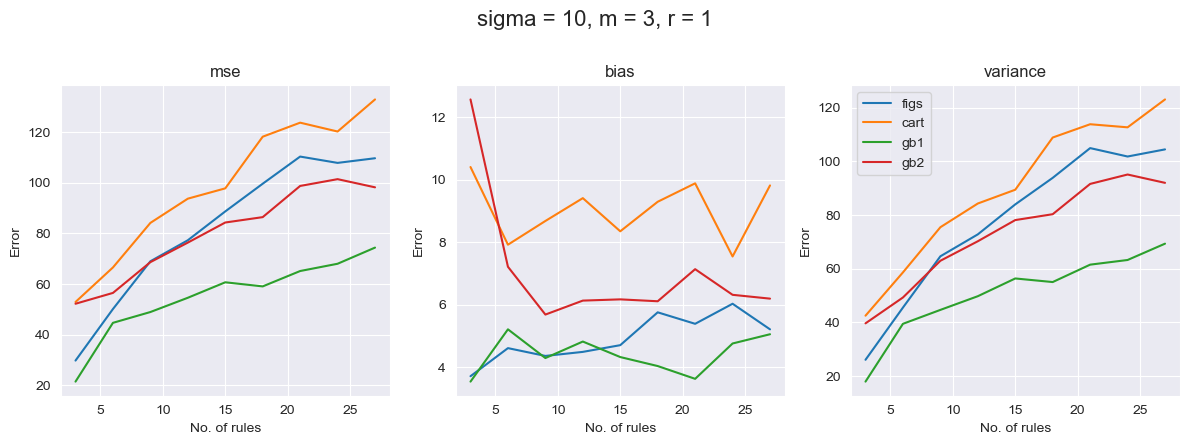

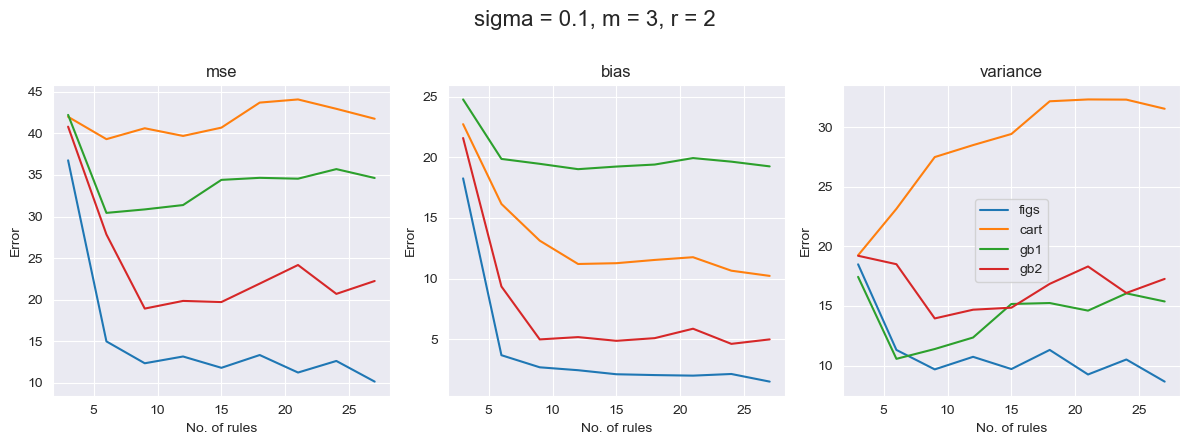

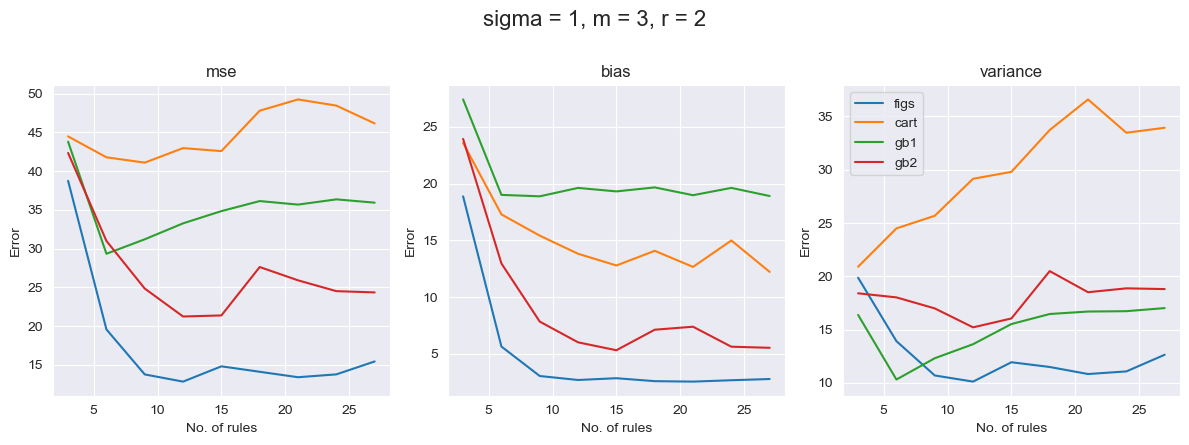

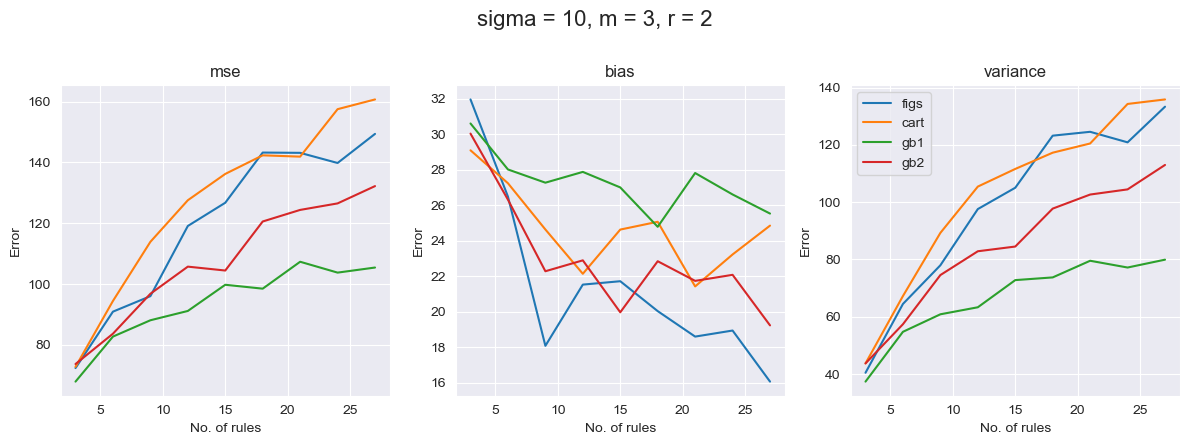

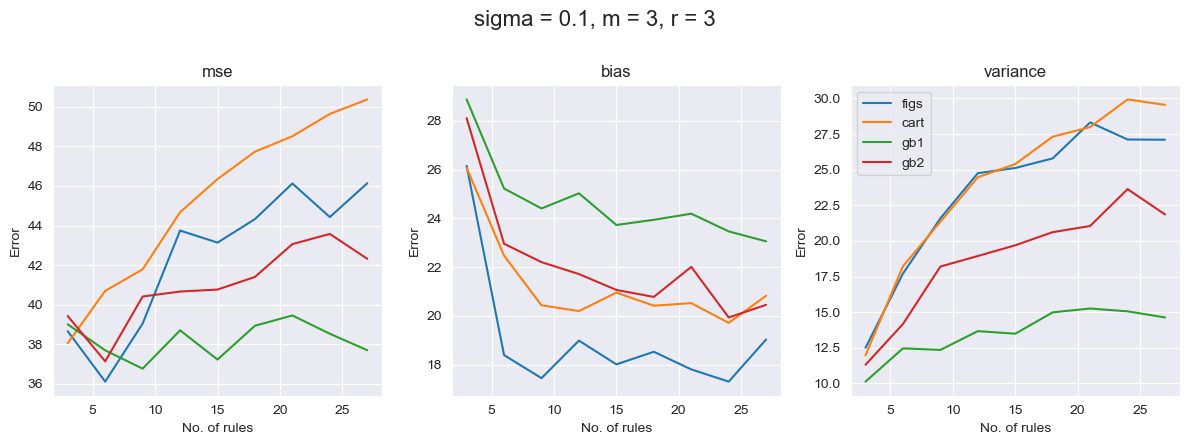

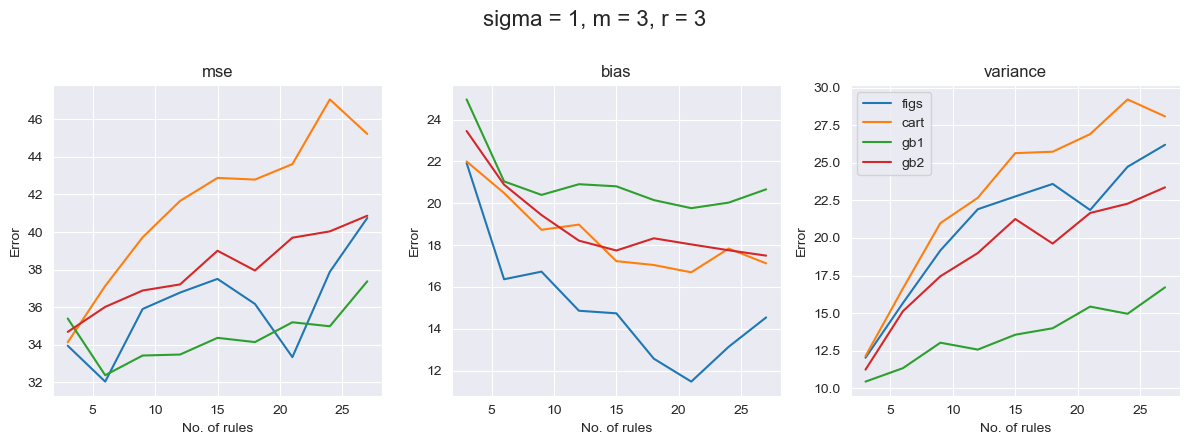

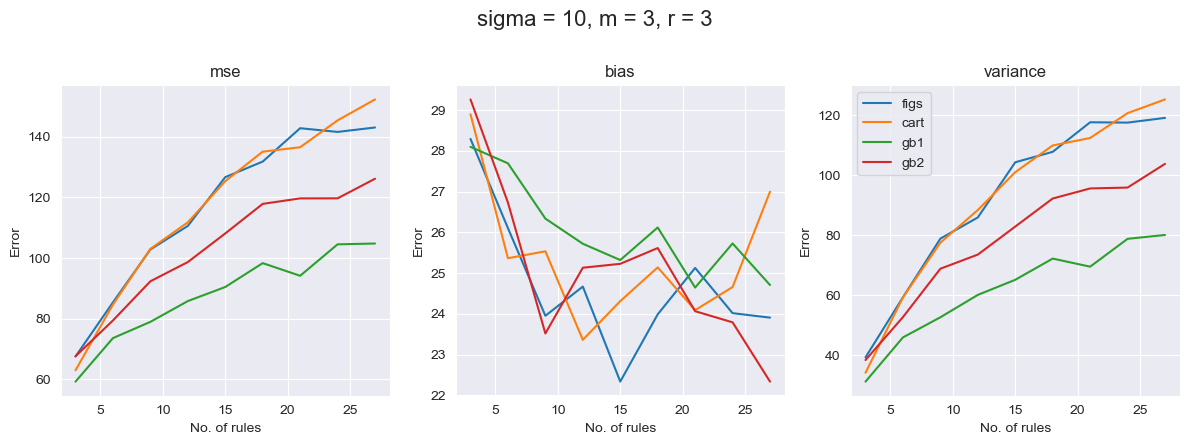

In [7]:
for results in lss_results:
    plot_curves(results, with_linear=False)